<a href="https://colab.research.google.com/github/IvanKatorgin/Deep-Learning/blob/main/Deep_Learning_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Deep Learning". Домашнее задание 4. Архитектуры свёрточных сетей. Каторгин И.П.

## Задание
Проведите эксперименты по начальному обучению различных моделей и сравните результаты.

1. Возьмите датасет EMNIST из torchvision.
2. Обучите на нём модели: ResNet 18, VGG 16, Inception v3, DenseNet 161:
- желательно обучить каждую модель с нуля по 10 эпох
- если ресурсов компьютера / Colab не хватает, достаточно обучить каждую модель по 1-2 эпохи
3. Сведите результаты обучения моделей (графики лосса) в таблицу и сравните их.

Дополнительное задание (выполняется по желанию):
- Выполните то же задание, используя датасет hymenoptera_data (https://www.kaggle.com/datasets/ajayrana/hymenoptera-data/code)

Инструкция к выполнению задания
1. Загрузите датасет, посмотрите примеры картинок в нём и проверьте наличествующие классы и их дисбаланс.
2. Создайте модель текущего типа, используя интерфейс torchvision для нужного количества классов.
3. Обучите модель с нуля до 1-10 эпох — количество эпох выбираете сами в зависимости от вычислительных ресурсов. Фиксируйте значение функции потерь в список для последующего отображения.
4. Повторите пункты 2 и 3 для всех указанных вариантов моделей.

## Загрузим библиотеки и подготовим датасет hymenoptera_data

In [1]:
# загрузим библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, time, cv2
from collections import Counter
%matplotlib inline

In [2]:
import torch
from torch import nn
import torchvision as tv
from torchsummary import summary
from torch import autograd
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

Загрузим датасет с kaggle

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()  # Выберим файл kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ivankatorgin","key":"673195859d850121fc9f21ff199cf06a"}'}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                       title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
adilshamim8/social-media-addiction-vs-relationships       Students' Social Media Addiction                     7851  2025-05-10 14:38:02.713000           9131        130  1.0              
jayaantanaath/student-habits-vs-academic-performance      Student Habits vs Academic Performance              19512  2025-04-12 10:49:08.663000          36831        651  1.0              
orvile/stress-and-sleep-patterns                          Stress and Sleep Patterns                           18327  2025-05-25 08:26:17.490000           1495         22  0.88235295       
atharvasoundankar/ai-developer-productivity-dataset    

In [111]:
# загрузим данные из Kaggle
! kaggle datasets download -d ajayrana/hymenoptera-data

Dataset URL: https://www.kaggle.com/datasets/ajayrana/hymenoptera-data
License(s): CC0-1.0
hymenoptera-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
# проверка
! unzip -l hymenoptera-data.zip

Archive:  hymenoptera-data.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
    46706  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/0013035.jpg
   174618  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg
   126867  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg
    74013  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg
   143363  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg
    68516  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg
    92614  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg
    58536  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg
   101735  2019-09-25 09:56   hymenoptera_data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg
   11

In [113]:
# загрузка
! unzip hymenoptera-data.zip

Archive:  hymenoptera-data.zip
replace hymenoptera_data/hymenoptera_data/train/ants/0013035.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: hymenoptera_data/hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymeno

In [114]:
# Функция оценки точности и потерь
def evaluate_metrics(data_iter, net, loss_fn):
    loss_sum, acc_sum, n = 0, 0, 0
    net.eval()
    with torch.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            loss_sum += loss_fn(y_hat, y).item()
            acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
    return loss_sum/n, acc_sum/n

In [115]:
# Модифицированная функция обучения с сохранением всех метрик
def train(net, train_iter, val_iter, trainer, num_epochs):
    net.to(device)
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    net.train()

    # Инициализация списков для метрик
    metrics = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for i, (X, y) in enumerate(train_iter):
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            y_hat = net(X)
            l = loss_fn(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

            if i % 10 == 0:
                current_loss = train_l_sum / n
                current_acc = train_acc_sum / n
                print(f"Step {i}. Train acc: {current_acc:.3f}, Loss: {current_loss:.3f}")

        # Вычисляем метрики для эпохи
        epoch_train_loss = train_l_sum / n
        epoch_train_acc = train_acc_sum / n
        epoch_val_loss, epoch_val_acc = evaluate_metrics(val_iter, net, loss_fn)

        # Сохраняем метрики
        metrics['train_loss'].append(epoch_train_loss)
        metrics['train_acc'].append(epoch_train_acc)
        metrics['val_loss'].append(epoch_val_loss)
        metrics['val_acc'].append(epoch_val_acc)

        print('-' * 50)
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.3f}')
        print(f'Val Loss:  {epoch_val_loss:.4f} | Val Acc:  {epoch_val_acc:.3f}')
        print(f'Time: {time.time()-start:.1f} sec')
        print('-' * 50)

    return metrics

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [116]:
# Трансформации для аугментации и нормализации
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Загрузка датасетов
train_dataset = ImageFolder(
    root='hymenoptera_data/train',
    transform=train_transform
)

val_dataset = ImageFolder(
    root='hymenoptera_data/val',
    transform=val_transform
)

# Создание DataLoader
batch_size = 32
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

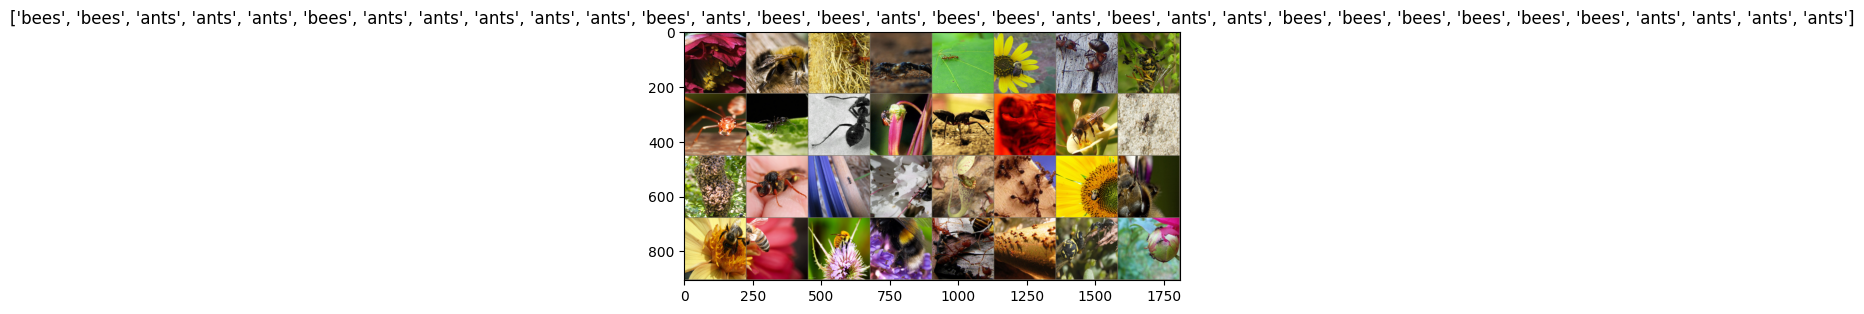

In [16]:
# Проверка данных
# Функция для отображения изображений
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Получаем один батч
inputs, classes = next(iter(train_loader))

# Создаем grid из изображений
out = tv.utils.make_grid(inputs)

# Показываем изображения с метками
imshow(out, title=[train_dataset.classes[x] for x in classes])

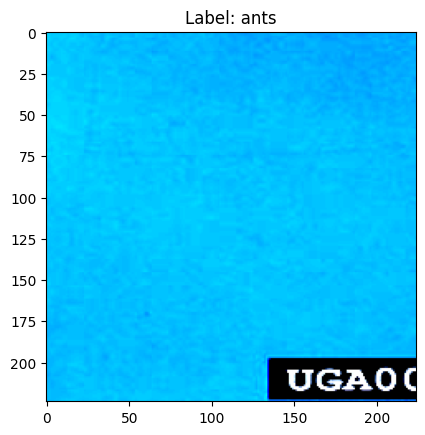

In [17]:
# Визуализация примера
plt.imshow(train_dataset[0][0].permute(1, 2, 0).numpy())
plt.title(f"Label: {train_dataset.classes[train_dataset[0][1]]}")
plt.show()

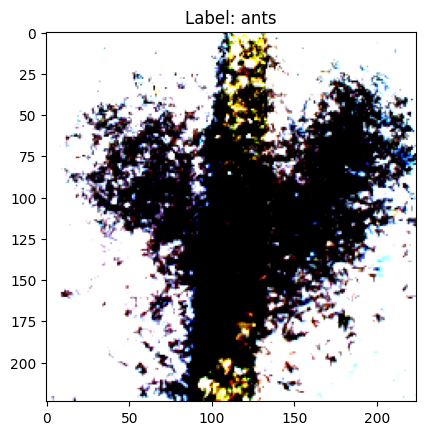

In [18]:
# Визуализация примера
plt.imshow(val_dataset[0][0].permute(1, 2, 0).numpy())
plt.title(f"Label: {val_dataset.classes[val_dataset[0][1]]}")
plt.show()

In [39]:
# посмотрим на количество классов
len(train_dataset.classes)

2

In [20]:
len(val_dataset.classes)

2

In [21]:
# посмотрим на названия классов
train_dataset.classes

['ants', 'bees']

In [22]:
val_dataset.classes

['ants', 'bees']

In [23]:
# посчитаем количество элементов в каждом классе (train_dataset)
# Преобразуем список меток в тензор
targets_tensor = torch.tensor(train_dataset.targets)

# Считаем уникальные значения
values, counts = torch.unique(targets_tensor, return_counts=True)

print("Количество элементов в классе (train_dataset):")
for value, count in zip(values, counts):
    print(f"Class {value} ({train_dataset.classes[value]}): {count} samples")

Количество элементов в классе (train_dataset):
Class 0 (ants): 123 samples
Class 1 (bees): 121 samples


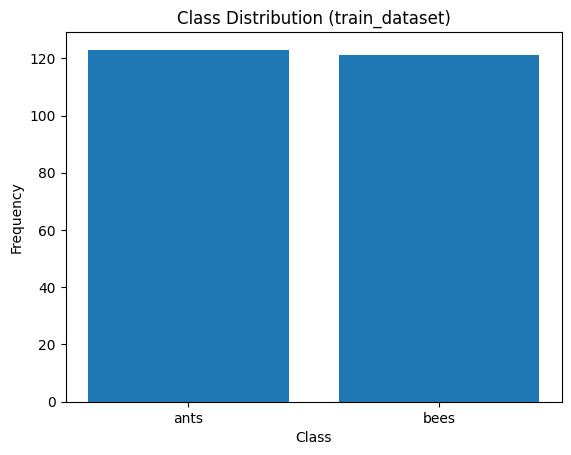

In [24]:
# визуализируем распределение классов (train_dataset)
classes = train_dataset.classes
counts = torch.unique(targets_tensor, return_counts=True)[1]
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (train_dataset)')
plt.xticks(classes)
plt.show()

In [25]:
# посчитаем количество элементов в каждом классе (val_dataset)
# Преобразуем список меток в тензор
targets_tensor = torch.tensor(val_dataset.targets)

# Считаем уникальные значения
values, counts = torch.unique(targets_tensor, return_counts=True)

print("Количество элементов в классе (val_dataset):")
for value, count in zip(values, counts):
    print(f"Class {value} ({train_dataset.classes[value]}): {count} samples")

Количество элементов в классе (val_dataset):
Class 0 (ants): 70 samples
Class 1 (bees): 83 samples


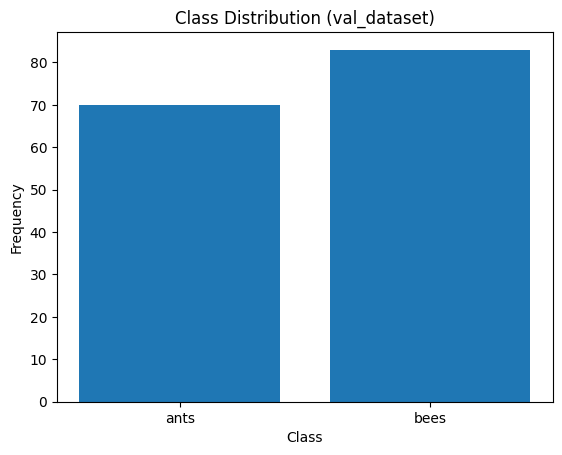

In [26]:
# визуализируем распределение классов (val_dataset)
classes = train_dataset.classes
counts = torch.unique(targets_tensor, return_counts=True)[1]
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (val_dataset)')
plt.xticks(classes)
plt.show()

Условно можно считать, что все классы сбалансированы

## ResNet 18

In [41]:
BATCH_SIZE = 32

# создадим преобразование
transforms = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Преобразование серого в RGB
])

# Перезагрузим наборы данных с новыми преобразованием
train_dataset = train_dataset
val_dataset = val_dataset

# Создадим новые DataLoaders с обновленным набором данных
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_iter = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [42]:
# загрузим модель ResNet 18
model = tv.models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
# Убираем требование градиента:
for param in model.parameters():
    param.requires_grad = False

In [45]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [46]:
model.fc = nn.Linear(512, len(train_dataset.classes))

In [47]:
summary(model.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [48]:
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 fc.weight
	 fc.bias


In [49]:
trainer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

In [50]:
# из-за переполнения памяти сделаем 4 эпохи
metrics_resnet18 = train(model, train_iter, val_iter, trainer, 4)

Step 0. Train acc: 0.562, Loss: 0.710
--------------------------------------------------
Epoch 1/4
Train Loss: 0.7155 | Train Acc: 0.557
Val Loss:  0.5645 | Val Acc:  0.752
Time: 42.7 sec
--------------------------------------------------
Step 0. Train acc: 0.719, Loss: 0.545
--------------------------------------------------
Epoch 2/4
Train Loss: 0.5319 | Train Acc: 0.742
Val Loss:  0.4142 | Val Acc:  0.843
Time: 46.5 sec
--------------------------------------------------
Step 0. Train acc: 0.906, Loss: 0.408
--------------------------------------------------
Epoch 3/4
Train Loss: 0.3934 | Train Acc: 0.877
Val Loss:  0.3271 | Val Acc:  0.922
Time: 44.3 sec
--------------------------------------------------
Step 0. Train acc: 0.875, Loss: 0.404
--------------------------------------------------
Epoch 4/4
Train Loss: 0.3453 | Train Acc: 0.898
Val Loss:  0.2845 | Val Acc:  0.928
Time: 39.8 sec
--------------------------------------------------


In [51]:
# Визуализация метрик
def plot_metrics(metrics):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

    # График потерь
    ax1.plot(metrics['train_loss'], label='Train')
    ax1.plot(metrics['val_loss'], label='Val')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # График точности
    ax2.plot(metrics['train_acc'], label='Train')
    ax2.plot(metrics['val_acc'], label='Val')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

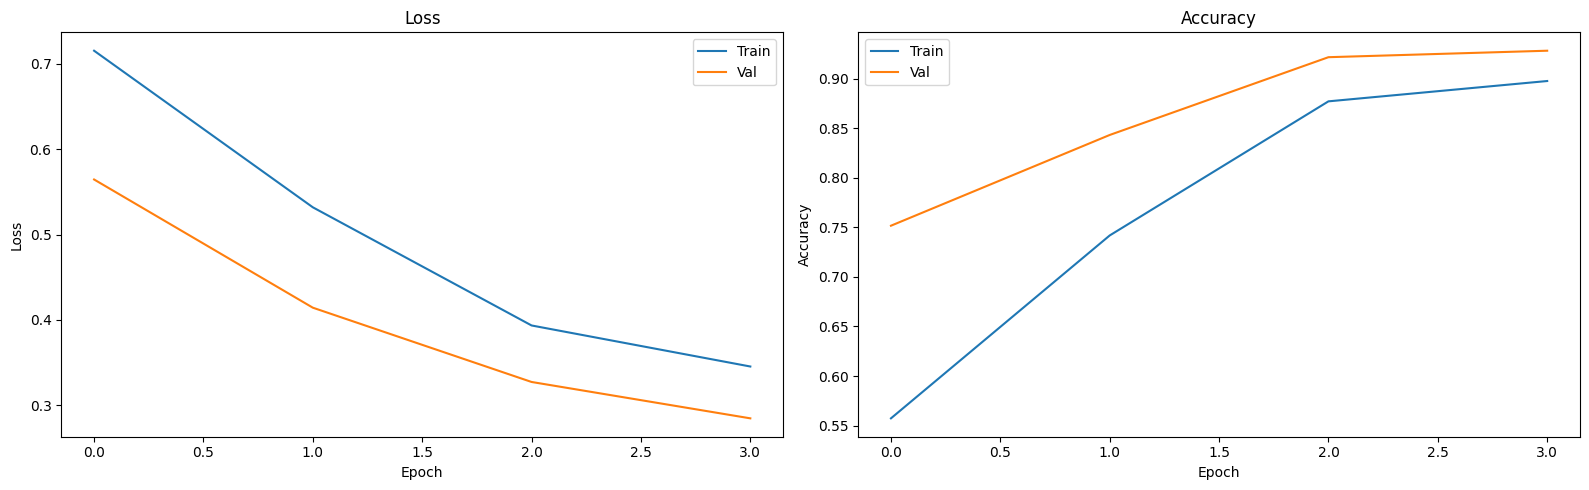

In [52]:
# Визуализация метрик
plot_metrics(metrics_resnet18)

In [53]:
# Сохранение метрик в таблицу
metrics_df_resnet18 = pd.DataFrame({
    'Epoch': range(1, len(metrics_resnet18['train_loss'])+1),
    'Train Loss': metrics_resnet18['train_loss'],
    'Train Acc': metrics_resnet18['train_acc'],
    'Val Loss': metrics_resnet18['val_loss'],
    'Val Acc': metrics_resnet18['val_acc']
})


In [54]:
# Красивое отображение таблицы
def display_metrics_table(df):
    from IPython.display import display
    styled_df = df.style\
        .format({
            'Train Loss': '{:.4f}',
            'Val Loss': '{:.4f}',
            'Train Acc': '{:.2%}',
            'Val Acc': '{:.2%}'
        })\
        .background_gradient(cmap='YlGnBu', subset=['Train Acc', 'Val Acc'])\
        .background_gradient(cmap='YlOrRd', subset=['Train Loss', 'Val Loss'])
    display(styled_df)

In [55]:
# Красивое отображение таблицы
display_metrics_table(metrics_df_resnet18)

,Epoch,Train Loss,Train Acc,Val Loss,Val Acc
0,1,0.7155,55.74%,0.5645,75.16%
1,2,0.5319,74.18%,0.4142,84.31%
2,3,0.3934,87.70%,0.3271,92.16%
3,4,0.3453,89.75%,0.2845,92.81%


In [56]:
# Сохранение результатов
torch.save(model.state_dict(), 'emnist_resnet18.pth')
metrics_df_resnet18.to_csv('training_metrics_resnet18.csv', index=False)
print("Модель и метрики сохранены!")

Модель и метрики сохранены!


## VGG 16

In [57]:
BATCH_SIZE = 32

# создадим преобразование
transforms = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Преобразование серого в RGB
])

# Перезагрузим наборы данных с новыми преобразованием
train_dataset = train_dataset
val_dataset = val_dataset

# Создадим новые DataLoaders с обновленным набором данных
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_iter = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [58]:
# загрузим модель VGG 16
model = tv.models.vgg16(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 74.2MB/s]


In [59]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [60]:
# Убираем требование градиента:
for param in model.parameters():
    param.requires_grad = False

In [61]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [62]:
# Меняем классификатор (должен поддерживать корректные размеры входных данных):
model.classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, len(train_dataset.classes)))  # 2 класса

In [63]:
summary(model.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [64]:
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.0.weight
	 classifier.0.bias
	 classifier.3.weight
	 classifier.3.bias
	 classifier.6.weight
	 classifier.6.bias


In [65]:
trainer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)

In [66]:
# из-за переполнения памяти сделаем 4 эпохи
metrics_vgg16 = train(model, train_iter, val_iter, trainer, 4)

Step 0. Train acc: 0.469, Loss: 0.731
--------------------------------------------------
Epoch 1/4
Train Loss: 14.2148 | Train Acc: 0.508
Val Loss:  0.4763 | Val Acc:  0.824
Time: 304.9 sec
--------------------------------------------------
Step 0. Train acc: 0.875, Loss: 0.349
--------------------------------------------------
Epoch 2/4
Train Loss: 0.3066 | Train Acc: 0.893
Val Loss:  0.2906 | Val Acc:  0.935
Time: 292.9 sec
--------------------------------------------------
Step 0. Train acc: 0.938, Loss: 0.106
--------------------------------------------------
Epoch 3/4
Train Loss: 0.2083 | Train Acc: 0.930
Val Loss:  0.3477 | Val Acc:  0.902
Time: 298.8 sec
--------------------------------------------------
Step 0. Train acc: 0.875, Loss: 0.274
--------------------------------------------------
Epoch 4/4
Train Loss: 0.2543 | Train Acc: 0.910
Val Loss:  0.2852 | Val Acc:  0.928
Time: 292.8 sec
--------------------------------------------------


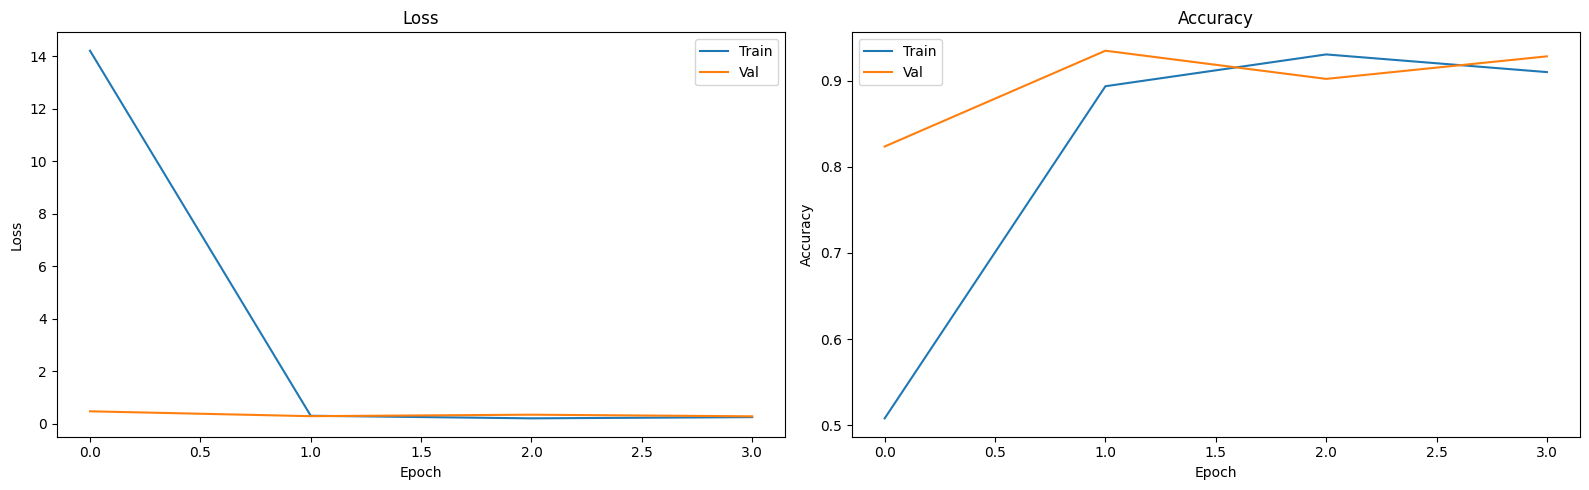

In [67]:
# Визуализация метрик
plot_metrics(metrics_vgg16)

In [68]:
# Сохранение метрик в таблицу
metrics_df_vgg16 = pd.DataFrame({
    'Epoch': range(1, len(metrics_vgg16['train_loss'])+1),
    'Train Loss': metrics_vgg16['train_loss'],
    'Train Acc': metrics_vgg16['train_acc'],
    'Val Loss': metrics_vgg16['val_loss'],
    'Val Acc': metrics_vgg16['val_acc']
})

In [69]:
# Красивое отображение таблицы
display_metrics_table(metrics_df_vgg16)

,Epoch,Train Loss,Train Acc,Val Loss,Val Acc
0,1,14.2148,50.82%,0.4763,82.35%
1,2,0.3066,89.34%,0.2906,93.46%
2,3,0.2083,93.03%,0.3477,90.20%
3,4,0.2543,90.98%,0.2852,92.81%


In [70]:
# Сохранение результатов
torch.save(model.state_dict(), 'emnist_vgg16.pth')
metrics_df_vgg16.to_csv('training_metrics_vgg16.csv', index=False)
print("Модель и метрики сохранены!")

Модель и метрики сохранены!


## Inception v3

In [237]:
# Модифицированная функция обучения для Inception_v3
def train_inception(net, train_iter, val_iter, trainer, num_epochs):
    net.to(device)
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    net.train()

    # Убедимся, что aux_logits отключены
    if isinstance(net, tv.models.Inception3):
        net.aux_logits = False

    metrics = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        start = time.time()

        for i, (X, y) in enumerate(train_iter):
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()

            # Прямой проход
            outputs = net(X)

            # Для Inception_v3 с aux_logits=False получаем только основной выход
            l = loss_fn(outputs, y)
            l.backward()
            trainer.step()

            train_l_sum += l.item()
            train_acc_sum += (outputs.argmax(axis=1) == y).sum().item()
            n += y.shape[0]

            if i % 20 == 0:
                print(f"Batch {i}: Loss={train_l_sum/n:.3f}, Acc={train_acc_sum/n:.3f}")

        # Вычисление метрик после эпохи
        epoch_train_loss = train_l_sum / n
        epoch_train_acc = train_acc_sum / n

        # Функция оценки
        def evaluate_model(data_iter, net):
            net.eval()
            loss_sum, acc_sum, n = 0, 0, 0
            with torch.no_grad():
                for X, y in data_iter:
                    X, y = X.to(device), y.to(device)
                    outputs = net(X)
                    loss_sum += loss_fn(outputs, y).item()
                    acc_sum += (outputs.argmax(1) == y).sum().item()
                    n += y.shape[0]
            return loss_sum/n, acc_sum/n

        epoch_val_loss, epoch_val_acc = evaluate_model(val_iter, net)

        # Сохранение метрик
        metrics['train_loss'].append(epoch_train_loss)
        metrics['train_acc'].append(epoch_train_acc)
        metrics['val_loss'].append(epoch_val_loss)
        metrics['val_acc'].append(epoch_val_acc)

        print(f"\nEpoch {epoch+1}/{num_epochs}:")
        print(f"Train Loss: {epoch_train_loss:.4f} | Acc: {epoch_train_acc:.3f}")
        print(f"Val Loss:  {epoch_val_loss:.4f} | Acc:  {epoch_val_acc:.3f}")
        print(f"Time: {time.time()-start:.1f}s\n")

    return metrics

In [238]:
BATCH_SIZE = 16

# Создадим преобразование с правильным размером для Inception_v3 (299x299)
transforms = tv.transforms.Compose([
        tv.transforms.Resize(342),  # Сначала увеличиваем
        tv.transforms.CenterCrop(299),  # Затем обрезаем до 299x299
        tv.transforms.ToTensor(),
        tv.transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
        tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Перезагрузим наборы данных с новыми преобразованием
train_dataset = train_dataset
val_dataset = val_dataset

# Создадим новые DataLoaders с обновленным набором данных
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_iter = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [239]:
# загрузим модель inception_v3
model = tv.models.inception_v3(pretrained=True)

In [240]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [241]:
# Убираем требование градиента:
for param in model.parameters():
    param.requires_grad = False

In [242]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [243]:
# Меняем последний слой
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))

In [244]:
summary(model.to(device), input_size=(3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [245]:
print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")

Trainable Parameters:
fc.weight: torch.Size([2, 2048])
fc.bias: torch.Size([2])


In [246]:
trainer = torch.optim.Adam(model.parameters(), lr=0.001)

In [247]:
# из-за переполнения памяти сделаем 4 эпохи
metrics_inception_v3 = train_inception(model, train_iter, val_iter, trainer, 4)

Batch 0: Loss=0.747, Acc=0.375

Epoch 1/4:
Train Loss: 0.6608 | Acc: 0.607
Val Loss:  0.5007 | Acc:  0.765
Time: 153.0s

Batch 0: Loss=0.544, Acc=0.688

Epoch 2/4:
Train Loss: 0.3518 | Acc: 0.906
Val Loss:  0.2991 | Acc:  0.935
Time: 144.1s

Batch 0: Loss=0.235, Acc=1.000

Epoch 3/4:
Train Loss: 0.2193 | Acc: 0.988
Val Loss:  0.2322 | Acc:  0.948
Time: 143.7s

Batch 0: Loss=0.160, Acc=1.000

Epoch 4/4:
Train Loss: 0.1530 | Acc: 0.988
Val Loss:  0.2005 | Acc:  0.961
Time: 144.0s



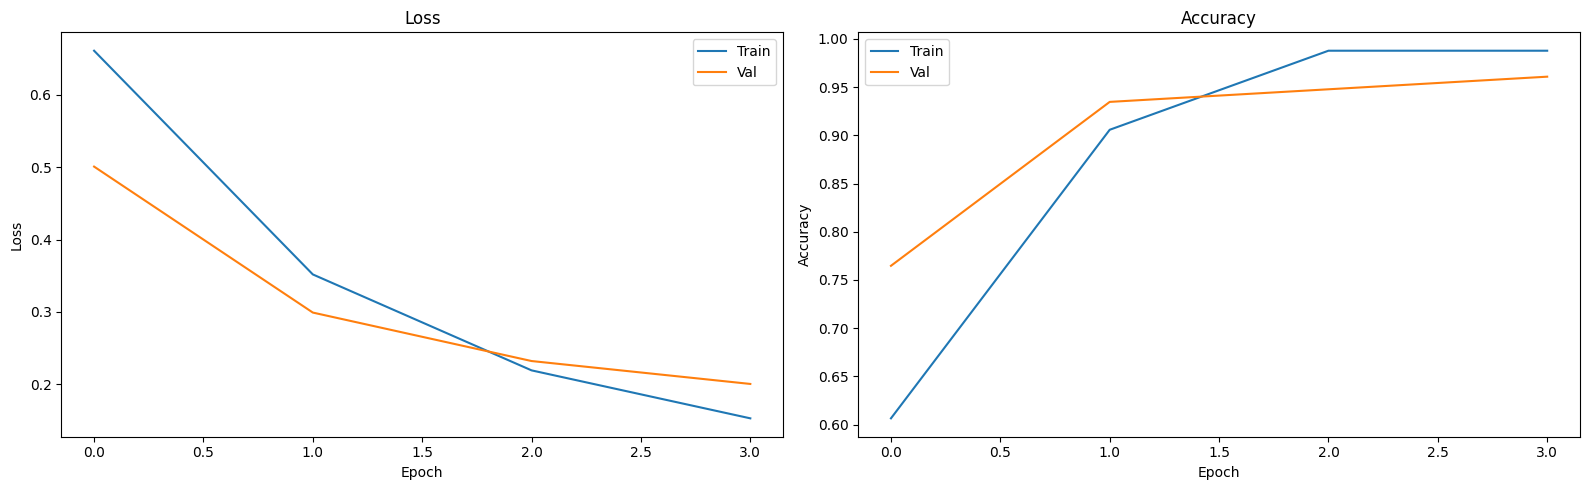

In [248]:
# Визуализация метрик
plot_metrics(metrics_inception_v3)

In [249]:
# Сохранение метрик в таблицу
metrics_df_inception_v3 = pd.DataFrame({
    'Epoch': range(1, len(metrics_inception_v3['train_loss'])+1),
    'Train Loss': metrics_inception_v3['train_loss'],
    'Train Acc': metrics_inception_v3['train_acc'],
    'Val Loss': metrics_inception_v3['val_loss'],
    'Val Acc': metrics_inception_v3['val_acc']
})

In [250]:
# Красивое отображение таблицы
display_metrics_table(metrics_df_inception_v3)

,Epoch,Train Loss,Train Acc,Val Loss,Val Acc
0,1,0.6608,60.66%,0.5007,76.47%
1,2,0.3518,90.57%,0.2991,93.46%
2,3,0.2193,98.77%,0.2322,94.77%
3,4,0.1530,98.77%,0.2005,96.08%


In [251]:
# Сохранение результатов
torch.save(model.state_dict(), 'emnist_inception_v3.pth')
metrics_df_inception_v3.to_csv('training_metrics_inception_v3.csv', index=False)
print("Модель и метрики сохранены!")

Модель и метрики сохранены!


## DenseNet 161

In [117]:
BATCH_SIZE = 32
input_size = (3, 224, 224)

# Преобразования
transforms = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor(),
    tv.transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Загрузка данных
train_dataset = train_dataset
val_dataset = val_dataset
train_iter = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_iter = DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [118]:
# загрузим модель DenseNet 161
model = tv.models.densenet161(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 106MB/s]


In [119]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [120]:
# Убираем требование градиента:
for param in model.parameters():
    param.requires_grad = False

In [121]:
model.classifier.in_features

2208

In [122]:
# Меняем классификатор
model.classifier = nn.Linear(2208, len(train_dataset.classes))

In [123]:
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

In [124]:
# Вывод информации
print("\nDenseNet161 Configuration:")
print(f"Input size: {input_size}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classifier input features: {model.classifier.in_features}")
print(f"Classifier output features: {model.classifier.out_features}")


DenseNet161 Configuration:
Input size: (3, 224, 224)
Number of classes: 2
Classifier input features: 2208
Classifier output features: 2


In [125]:
# Проверка обучаемых параметров
print("\nTrainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")


Trainable Parameters:
classifier.weight: torch.Size([2, 2208])
classifier.bias: torch.Size([2])


In [126]:
# Проверка прямого прохода
test_input = torch.randn(1, *input_size).to(device)
try:
    output = model(test_input)
    print(f"\nTest forward pass successful! Output shape: {output.shape}")
except Exception as e:
    print(f"\nForward pass error: {e}")


Test forward pass successful! Output shape: torch.Size([1, 2])


In [127]:
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.weight
	 classifier.bias


In [128]:
trainer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)

In [129]:
# из-за переполнения памяти сделаем 4 эпохи
metrics_denseNet161 = train(model, train_iter, val_iter, trainer, 4)

Step 0. Train acc: 0.625, Loss: 0.693
--------------------------------------------------
Epoch 1/4
Train Loss: 0.5641 | Train Acc: 0.709
Val Loss:  0.3998 | Val Acc:  0.922
Time: 270.4 sec
--------------------------------------------------
Step 0. Train acc: 0.969, Loss: 0.386
--------------------------------------------------
Epoch 2/4
Train Loss: 0.3275 | Train Acc: 0.943
Val Loss:  0.2571 | Val Acc:  0.941
Time: 210.1 sec
--------------------------------------------------
Step 0. Train acc: 0.969, Loss: 0.227
--------------------------------------------------
Epoch 3/4
Train Loss: 0.2238 | Train Acc: 0.955
Val Loss:  0.1890 | Val Acc:  0.961
Time: 206.4 sec
--------------------------------------------------
Step 0. Train acc: 1.000, Loss: 0.134
--------------------------------------------------
Epoch 4/4
Train Loss: 0.1717 | Train Acc: 0.967
Val Loss:  0.1613 | Val Acc:  0.948
Time: 205.4 sec
--------------------------------------------------


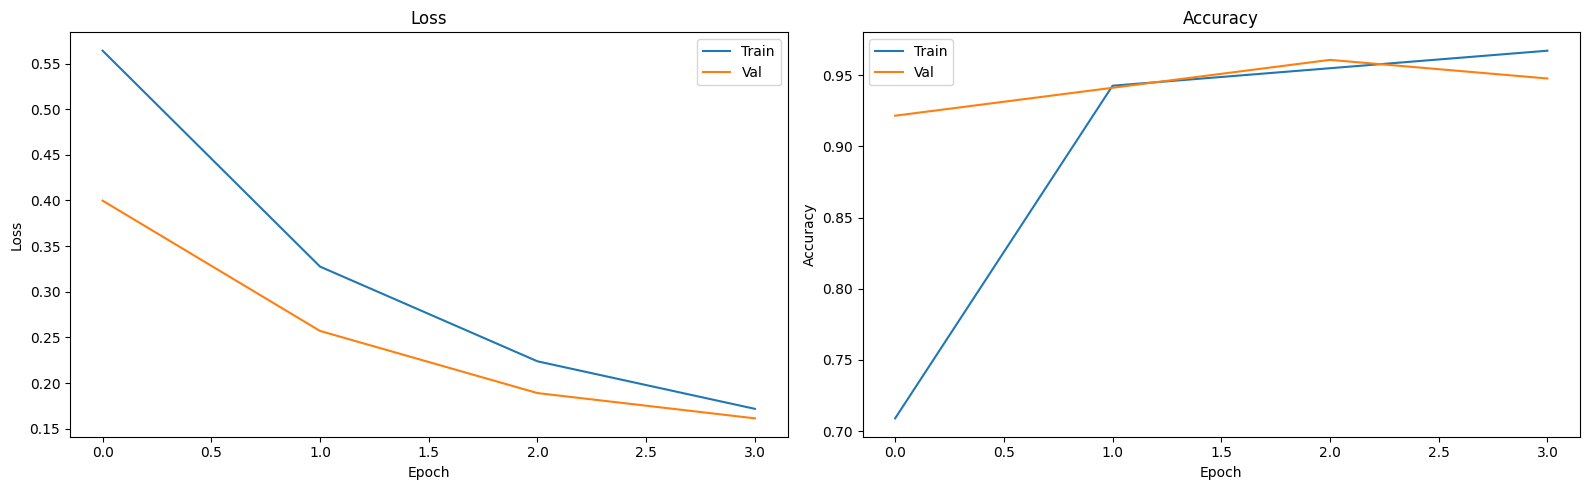

In [130]:
# Визуализация метрик
plot_metrics(metrics_denseNet161)

In [131]:
# Сохранение метрик в таблицу
metrics_df_denseNet161 = pd.DataFrame({
    'Epoch': range(1, len(metrics_denseNet161['train_loss'])+1),
    'Train Loss': metrics_denseNet161['train_loss'],
    'Train Acc': metrics_denseNet161['train_acc'],
    'Val Loss': metrics_denseNet161['val_loss'],
    'Val Acc': metrics_denseNet161['val_acc']
})

In [132]:
# Красивое отображение таблицы
display_metrics_table(metrics_df_denseNet161)

,Epoch,Train Loss,Train Acc,Val Loss,Val Acc
0,1,0.5641,70.90%,0.3998,92.16%
1,2,0.3275,94.26%,0.2571,94.12%
2,3,0.2238,95.49%,0.1890,96.08%
3,4,0.1717,96.72%,0.1613,94.77%


In [133]:
# Сохранение результатов
torch.save(model.state_dict(), 'emnist_denseNet161.pth')
metrics_df_denseNet161.to_csv('training_metrics_denseNet161.csv', index=False)
print("Модель и метрики сохранены!")

Модель и метрики сохранены!


## Сводная таблица и график

In [134]:
# Создаем сводную таблицу всех метрик
def create_metrics_table(*all_metrics):
    """Объединяет метрики из всех экспериментов в одну таблицу"""
    dfs = []

    for i, metrics in enumerate(all_metrics, 1):
        df = pd.DataFrame({
            'Epoch': range(1, len(metrics['train_loss'])+1),
            'Model': f'Model_{i}',
            'Train_Loss': metrics['train_loss'],
            'Train_Acc': metrics['train_acc'],
            'Val_Loss': metrics['val_loss'],
            'Val_Acc': metrics['val_acc']
        })
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True)

In [135]:
# Функция для визуализации всех метрик
def plot_combined_metrics(combined_df):
    plt.figure(figsize=(16, 10))

    # Уникальные модели
    models = combined_df['Model'].unique()
    n_models = len(models)

    # Цветовая схема
    colors = plt.cm.tab10(np.linspace(0, 1, n_models))

    # График потерь
    plt.subplot(2, 2, 1)
    for i, model in enumerate(models):
        model_df = combined_df[combined_df['Model'] == model]
        plt.plot(model_df['Epoch'], model_df['Train_Loss'],
                label=f'{model} Train', color=colors[i], linestyle='-')
        plt.plot(model_df['Epoch'], model_df['Val_Loss'],
                label=f'{model} Val', color=colors[i], linestyle='--')
    plt.title('Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(2, 2, 2)
    for i, model in enumerate(models):
        model_df = combined_df[combined_df['Model'] == model]
        plt.plot(model_df['Epoch'], model_df['Train_Acc'],
                label=f'{model} Train', color=colors[i], linestyle='-')
        plt.plot(model_df['Epoch'], model_df['Val_Acc'],
                label=f'{model} Val', color=colors[i], linestyle='--')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Boxplot потерь
    plt.subplot(2, 2, 3)
    box_data = [combined_df[combined_df['Model'] == m]['Val_Loss'] for m in models]
    plt.boxplot(box_data, labels=models)
    plt.title('Val Loss Distribution')
    plt.ylabel('Loss')

    # Boxplot точности
    plt.subplot(2, 2, 4)
    box_data = [combined_df[combined_df['Model'] == m]['Val_Acc'] for m in models]
    plt.boxplot(box_data, labels=models)
    plt.title('Val Accuracy Distribution')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

In [136]:
# Создаем и сохраняем сводный отчет
def create_full_report(combined_df):
    # Группировка по модели
    report = combined_df.groupby('Model').agg({
        'Train_Loss': ['min', 'mean', 'max'],
        'Train_Acc': ['max', 'mean', 'min'],
        'Val_Loss': ['min', 'mean', 'max'],
        'Val_Acc': ['max', 'mean', 'min']
    })

    # Сохранение в файлы
    combined_df.to_csv('all_models_metrics.csv', index=False)
    report.to_csv('models_summary_report.csv')

    # Красивое отображение
    styled_report = report.style\
        .format('{:.4f}', subset=[('Train_Loss', 'mean'), ('Val_Loss', 'mean')])\
        .format('{:.2%}', subset=[('Train_Acc', 'mean'), ('Val_Acc', 'mean')])\
        .background_gradient(cmap='Blues')

    return styled_report

In [252]:
# объединим все метрики всех моделей в одну таблицу
combined_df = create_metrics_table(metrics_resnet18, metrics_vgg16, metrics_inception_v3, metrics_denseNet161)
combined_df

,Epoch,Model,Train_Loss,Train_Acc,Val_Loss,Val_Acc
0,1,Model_1,0.715451,0.557377,0.564499,0.751634
1,2,Model_1,0.531894,0.741803,0.414217,0.843137
2,3,Model_1,0.393380,0.877049,0.327143,0.921569
3,4,Model_1,0.345267,0.897541,0.284508,0.928105
4,1,Model_2,14.214767,0.508197,0.476338,0.823529
5,2,Model_2,0.306578,0.893443,0.290604,0.934641
6,3,Model_2,0.208281,0.930328,0.347659,0.901961
7,4,Model_2,0.254286,0.909836,0.285158,0.928105
8,1,Model_3,0.660758,0.606557,0.500706,0.764706
9,2,Model_3,0.351774,0.905738,0.299101,0.934641


<ipython-input-135-b093882b44a4>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=models)
<ipython-input-135-b093882b44a4>:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=models)


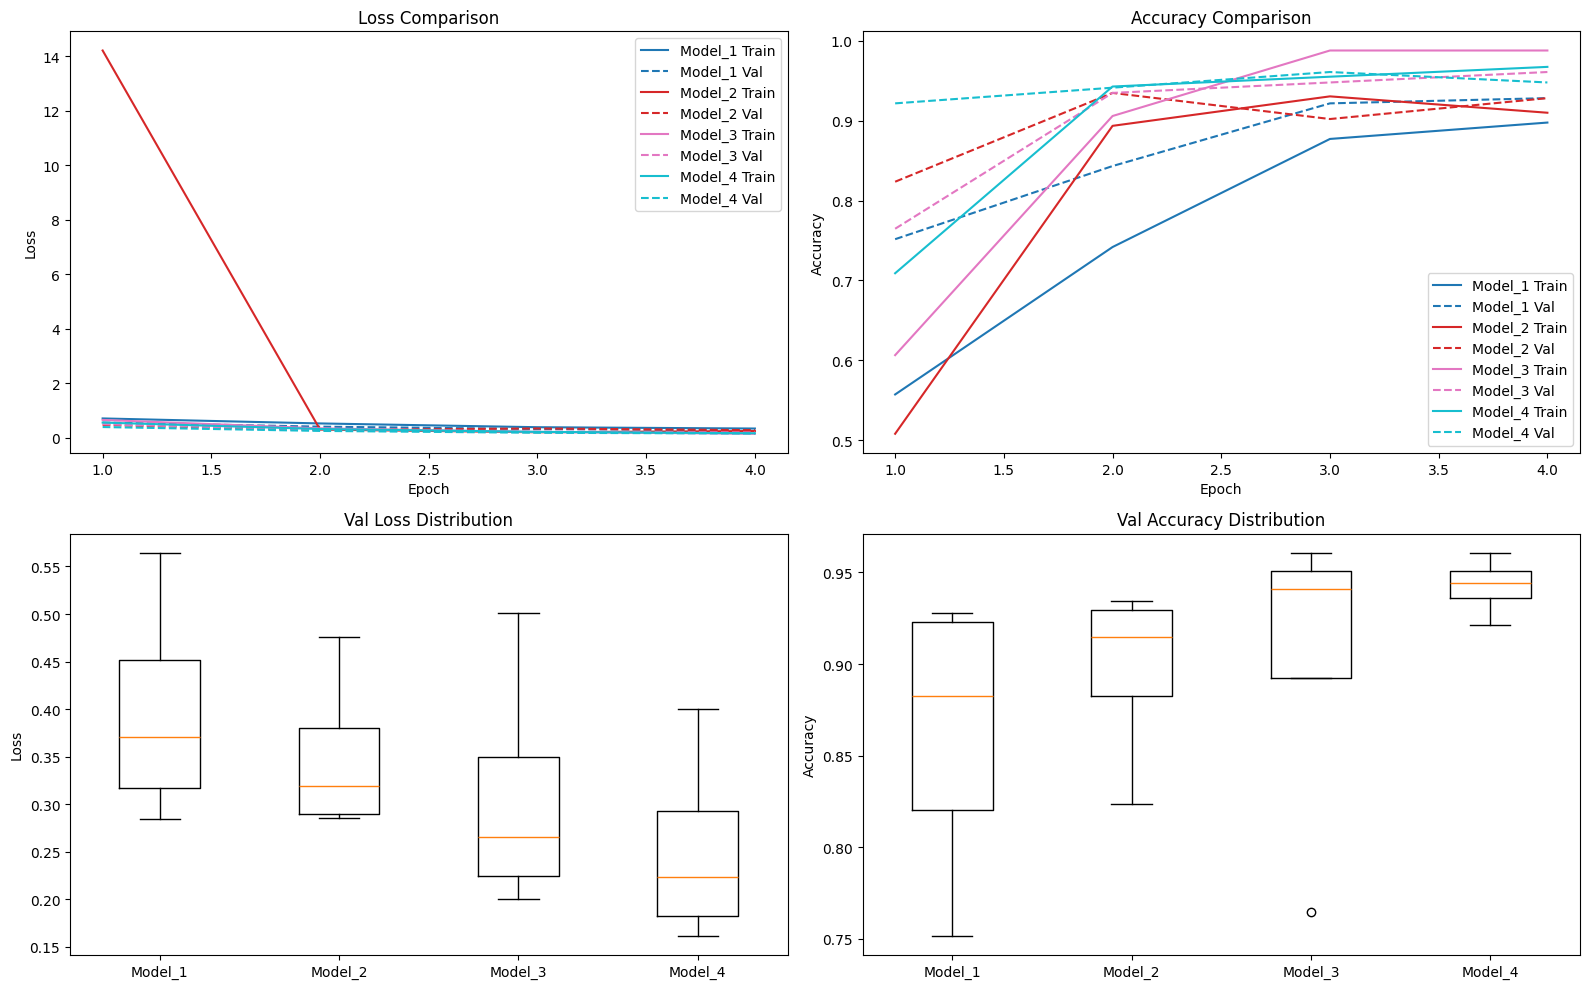

In [253]:
# строим график
plot_combined_metrics(combined_df)

In [254]:
# сохранаем отчет
report = create_full_report(combined_df)
display(report)

Выводы:
1. Обучены модели ResNet 18, VGG 16, Inception v3, DenseNet 161 на датасете hymenoptera_data
2. Оценки качества всех моделей достаточно высокие, несмотря на малое количество эпох обучения
3. Все модели могут быть использованы в дальнейшем